This is based in this [medium article](https://towardsdatascience.com/gantt-charts-with-pythons-matplotlib-395b7af72d72) and this other [article](https://www.datacamp.com/tutorial/how-to-make-gantt-chart-in-python-matplotlib)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_excel('/content/Time-Estimate-TFG.xlsx')
df = df.dropna()
df

,Name,Task,Time (h),Dependencies,Human Resources,Type,Start,End,Duration
1,Tutor Meetings,T1.1,10,-,"PM, AIC",PM,2023-01-02,2023-05-01,119.0
2,Contextualisation and Scope,T1.2,15,-,"PM,DS",PM,2023-01-02,2023-01-07,5.0
3,Project Planning,T1.3,12,T1.2,PM,PM,2023-01-07,2023-01-10,3.0
4,Economic Management,T1.4,12,T1.3,PM,PM,2023-03-02,2023-03-11,9.0
5,Sustainability Report,T1.5,12,T1.4,PM,PM,2023-03-11,2023-03-15,4.0
6,Final Document Synthesis,T1.6,40,"T1.5, T4.1, T4.2",PM,PM,2023-01-02,2023-05-01,119.0
7,Development Monitoring,T1.7,35,-,PM,PM,2023-01-02,2023-05-01,119.0
9,Study transformer Architecture,T2.1,60,T1.2,DS,RE,2023-01-10,2023-02-20,41.0
10,Familiarise with NLP techniques,T2.2,50,T1.2,DS,RE,2023-01-10,2023-02-20,41.0
11,Analyse Music Datasets,T2.3,50,T1.2,DS,RE,2023-01-10,2023-02-20,41.0


In [ ]:
# project start date
proj_start = df.Start.min()
print(proj_start)
# number of days from project start to task start
df['start_num'] = (df.Start-proj_start).dt.days
# number of days from project start to end of tasks
df['end_num'] = (df.End-proj_start).dt.days
# days between start and end of each task
df['days_start_to_end'] = df.end_num - df.start_num
df

2023-01-02 00:00:00


,Name,Task,Time (h),Dependencies,Human Resources,Type,Start,End,Duration,start_num,end_num,days_start_to_end
1,Tutor Meetings,T1.1,10,-,"PM, AIC",PM,2023-01-02,2023-05-01,119.0,0,119,119
2,Contextualisation and Scope,T1.2,15,-,"PM,DS",PM,2023-01-02,2023-01-07,5.0,0,5,5
3,Project Planning,T1.3,12,T1.2,PM,PM,2023-01-07,2023-01-10,3.0,5,8,3
4,Economic Management,T1.4,12,T1.3,PM,PM,2023-03-02,2023-03-11,9.0,59,68,9
5,Sustainability Report,T1.5,12,T1.4,PM,PM,2023-03-11,2023-03-15,4.0,68,72,4
6,Final Document Synthesis,T1.6,40,"T1.5, T4.1, T4.2",PM,PM,2023-01-02,2023-05-01,119.0,0,119,119
7,Development Monitoring,T1.7,35,-,PM,PM,2023-01-02,2023-05-01,119.0,0,119,119
9,Study transformer Architecture,T2.1,60,T1.2,DS,RE,2023-01-10,2023-02-20,41.0,8,49,41
10,Familiarise with NLP techniques,T2.2,50,T1.2,DS,RE,2023-01-10,2023-02-20,41.0,8,49,41
11,Analyse Music Datasets,T2.3,50,T1.2,DS,RE,2023-01-10,2023-02-20,41.0,8,49,41


In [ ]:
fig, ax = plt.subplots(1, figsize=(16,6))
df_aux = df.sort_values('Task', ascending=False)
ax.barh(df_aux.Task, df_aux.days_start_to_end, left=df_aux.start_num)
plt.show()

NameError: ignored

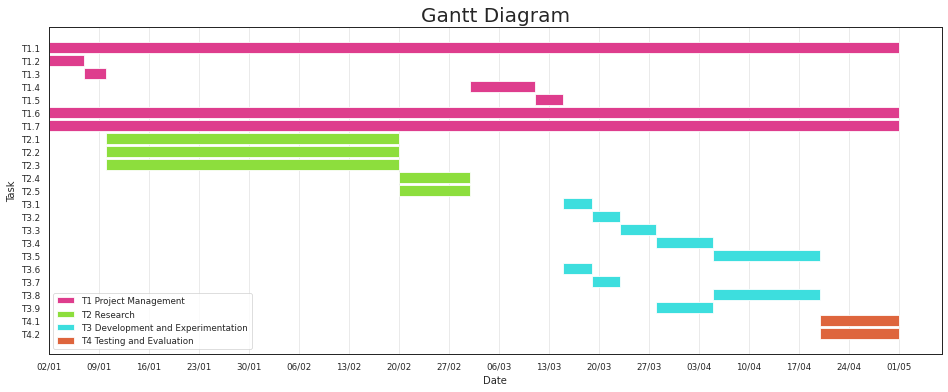

In [ ]:
from matplotlib.patches import Patch
import matplotlib.dates as mdates
import datetime as dt
import seaborn as sns
sns.set_theme(context="paper",style='white')
def color(row):
    c_dict = {'PM':'#de3d8d', 'RE':'#8dde3d', 'DE':'#3ddede', 'TE':'#de653d'}
    return c_dict[row['Type']]
df_aux['color'] = df_aux.apply(color, axis=1)
fig, ax = plt.subplots(1, figsize=(16,6))
ax.barh(df_aux.Task, df_aux.days_start_to_end, left=df_aux.start_num, color=df_aux.color)
##### LEGENDS #####
c_dict = {'T1 Project Management':'#de3d8d', 'T2 Research':'#8dde3d', 'T3 Development and Experimentation':'#3ddede',
          'T4 Testing and Evaluation':'#de653d'}
legend_elements = [Patch(facecolor=c_dict[i], label=i)  for i in c_dict]
plt.legend(handles=legend_elements)
##### TICKS #####

#xticks = np.arange(0, df_aux.end_num.max()+3)
#print(xticks)
#xticks_labels = pd.date_range(proj_start, end=df_aux.End.max()).strftime("%m/%d")
#print(xticks_labels)
#xticks_minor = np.arange(0, df.end_num.max()+1)
#print(xticks_minor)

#ax.set_xticks(xticks)
#ax.set_xticks(xticks_minor, minor=True)
#ax.set_xticklabels(xticks_labels[::3])


#plt.gcf().autofmt_xdate()

time_delta = 0
resolution = 7
xticks = np.arange(time_delta, df['end_num'].max()+1 , resolution)

# 4
xticklabels = pd.date_range(start=df['Start'].min() + dt.timedelta(days=time_delta), end=df['End'].max()).strftime("%d/%m")
# 5
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels[::resolution])

# 6
ax.xaxis.grid(True, alpha=0.5)
plt.title('Gantt Diagram',fontsize=20)
plt.xlabel('Date',fontsize=10)
plt.ylabel('Task',fontsize=10)
plt.show()

In [ ]:
cols =["Task","Start",	"End",	"start_num",	"end_num","days_start_to_end"]
time_df = df_aux[cols]
time_df

,Task,Start,End,start_num,end_num,days_start_to_end
26,T4.2,2023-04-20,2023-05-01,108,119,11
25,T4.1,2023-04-20,2023-05-01,108,119,11
23,T3.9,2023-03-28,2023-04-05,85,93,8
22,T3.8,2023-04-05,2023-04-20,93,108,15
21,T3.7,2023-03-19,2023-03-23,76,80,4
20,T3.6,2023-03-15,2023-03-19,72,76,4
19,T3.5,2023-04-05,2023-04-20,93,108,15
18,T3.4,2023-03-28,2023-04-05,85,93,8
17,T3.3,2023-03-23,2023-03-28,80,85,5
16,T3.2,2023-03-19,2023-03-23,76,80,4


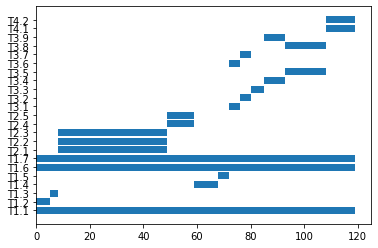

In [ ]:
plt.barh(y=df['Task'], width=df['days_start_to_end'], left=df['start_num'])
plt.show()

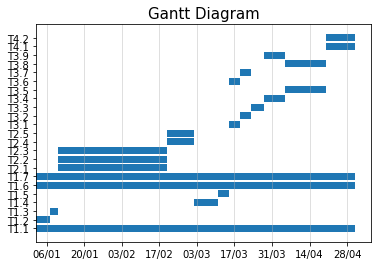

In [ ]:
# 1
fig, ax = plt.subplots()

plt.barh(y=df['Task'], width=df['days_start_to_end'], left=df['start_num'] + 1)
plt.title('Gantt Diagram', fontsize=15)

# 2
#plt.gca().invert_yaxis()

# 3
xticks = np.arange(5, df['end_num'].max() + 2, 14)

# 4
xticklabels = pd.date_range(start=df['Start'].min() + dt.timedelta(days=4), end=df['End'].max()).strftime("%d/%m")
# 5
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels[::14])

# 6
ax.xaxis.grid(True, alpha=0.5)

plt.show()

See [this](https://towardsdatascience.com/graph-visualisation-basics-with-python-part-iii-directed-graphs-with-graphviz-50116fb0d670) for reference when working with GraphViz

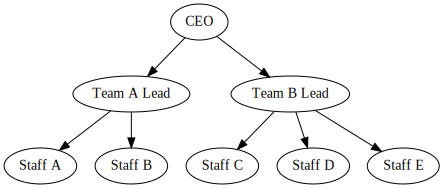

In [ ]:
import graphviz
f = graphviz.Digraph(filename = "output/plain organogram 1.gv")
names = ["A","B","C","D","E","F","G","H"]
positions = ["CEO","Team A Lead","Team B Lead", "Staff A","Staff B", "Staff C", "Staff D", "Staff E"]
for name, position in zip(names, positions):
     f.node(name, position)
 
#Specify edges
f.edge("A","B"); f.edge("A","C") #CEO to Team Leads
f.edge("B","D"); f.edge("B","E") #Team A relationship
f.edge("C","F"); f.edge("C","G"); f.edge("C","H") #Team B relationship
 
f

In [ ]:
df = pd.read_excel('/content/Time-Estimate-TFG.xlsx')
relevantdf = df[["Name","Task","Dependencies","Human Resources"]]
clean_df = relevantdf.dropna()

In [ ]:
clean_df

,Name,Task,Dependencies,Human Resources
1,Tutor Meetings,T1.1,-,"PM, AIC"
2,Contextualisation and Scope,T1.2,-,"PM,DS"
3,Project Planning,T1.3,T1.2,PM
4,Economic Management,T1.4,T1.3,PM
5,Sustainability Report,T1.5,T1.4,PM
6,Final Document Synthesis,T1.6,"T1.5, T4.1, T4.2",PM
7,Development Monitoring,T1.7,-,PM
9,Study transformer Architecture,T2.1,T1.2,DS
10,Familiarise with NLP techniques,T2.2,T1.2,DS
11,Analyse Music Datasets,T2.3,T1.2,DS


In [ ]:
colors = {
    "PM":"green",
    "DS":"red",
    "FSD":"blue"
    }

task: T1.1, dependencies: -
task: T1.2, dependencies: -
T1.3
task: T1.3, dependencies: T1.2
T1.4
task: T1.4, dependencies: T1.3
T1.5
task: T1.5, dependencies: T1.4
T1.6
T1.6
T1.6
task: T1.6, dependencies: T1.5, T4.1, T4.2
task: T1.7, dependencies: -
T2.1
task: T2.1, dependencies: T1.2
T2.2
task: T2.2, dependencies: T1.2
T2.3
task: T2.3, dependencies: T1.2
T2.4
T2.4
task: T2.4, dependencies: T2.1, T2.2
task: T2.5, dependencies: -
T3.1
T3.1
task: T3.1, dependencies: T2.4, T2.5
T3.2
T3.2
task: T3.2, dependencies: T2.3, T3.1
T3.3
task: T3.3, dependencies: T3.2
T3.4
task: T3.4, dependencies: T3.3
T3.5
task: T3.5, dependencies: T3.4
task: T3.6, dependencies: -
T3.7
T3.7
task: T3.7, dependencies: T3.6, T3.1
T3.8
task: T3.8, dependencies: T3.1
T3.9
T3.9
task: T3.9, dependencies: T3.8, T3.7
T4.1
T4.1
task: T4.1, dependencies: T3.4, T3.5
T4.2
task: T4.2, dependencies: T3.9


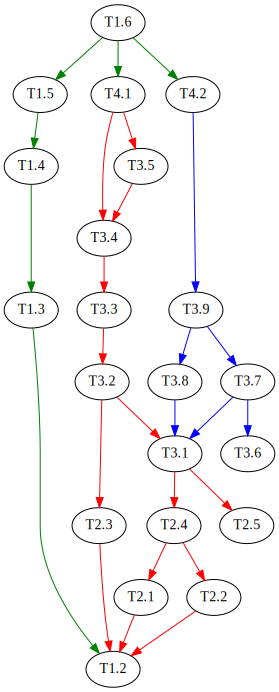

In [ ]:
import graphviz
f = graphviz.Digraph(filename = "task_dependency_graph",directory="/content/",format="png")
for (task,dependencies,task_type) in zip(clean_df["Task"],clean_df["Dependencies"],clean_df["Human Resources"]):
  if dependencies[0]!='-':
    for other_task in dependencies.split(", "):
      task_color = task_type.split(", ")[0]
      print(task)
      f.edge(task,other_task, color=colors[task_color]);
  print(f"task: {task}, dependencies: {dependencies}")
f.render()
f

[Plotly](https://plotly.com/python/gantt/#gantt-charts-and-timelines-with-plotlyexpress) is a nice alternative as well

In [ ]:
import plotly.express as px
import pandas as pd

df_aux = df
print(df_aux.columns)
fig = px.timeline(df, x_start="Start", x_end="End", y="Task", color="Type")
fig.update_yaxes(autorange="reversed") # otherwise tasks are listed from the bottom up
fig.show()
df

Index(['Name', 'Task', 'Time (h)', 'Dependencies', 'Human Resources', 'Type',
       'Start', 'End', 'Duration', 'start_num', 'end_num',
       'days_start_to_end'],
      dtype='object')


,Name,Task,Time (h),Dependencies,Human Resources,Type,Start,End,Duration,start_num,end_num,days_start_to_end
1,Tutor Meetings,T1.1,10,-,"PM, AIC",PM,2023-01-02,2023-05-01,119.0,0,119,119
2,Contextualisation and Scope,T1.2,15,-,"PM,DS",PM,2023-01-02,2023-01-07,5.0,0,5,5
3,Project Planning,T1.3,12,T1.2,PM,PM,2023-01-07,2023-01-10,3.0,5,8,3
4,Economic Management,T1.4,12,T1.3,PM,PM,2023-03-02,2023-03-11,9.0,59,68,9
5,Sustainability Report,T1.5,12,T1.4,PM,PM,2023-03-11,2023-03-15,4.0,68,72,4
6,Final Document Synthesis,T1.6,40,"T1.5, T4.1, T4.2",PM,PM,2023-01-02,2023-05-01,119.0,0,119,119
7,Development Monitoring,T1.7,35,-,PM,PM,2023-01-02,2023-05-01,119.0,0,119,119
9,Study transformer Architecture,T2.1,60,T1.2,DS,RE,2023-01-10,2023-02-20,41.0,8,49,41
10,Familiarise with NLP techniques,T2.2,50,T1.2,DS,RE,2023-01-10,2023-02-20,41.0,8,49,41
11,Analyse Music Datasets,T2.3,50,T1.2,DS,RE,2023-01-10,2023-02-20,41.0,8,49,41
